# **Task#1 To Explore Supervised Machine Learning**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("http://bit.ly/w-data")
print("Importing Successfull")

Importing Successfull


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## **Exploratory Data Analysis**

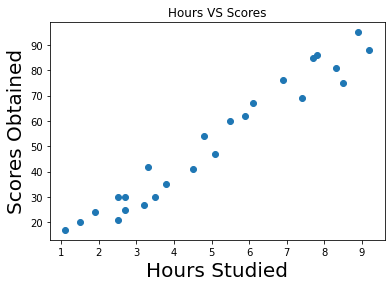

In [6]:
x=df['Hours']
y=df['Scores']
plt.scatter(x, y)  
plt.title('Hours VS Scores')  
plt.xlabel('Hours Studied',fontsize=20)  
plt.ylabel('Scores Obtained',fontsize=20)  
plt.show()


# **Data Preparation**

In [7]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [8]:
#Splitting data for train set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=92)

# **Model Training**

In [9]:
lm=LinearRegression()
lm.fit(X_train,y_train)
print("Training Done")

Training Done


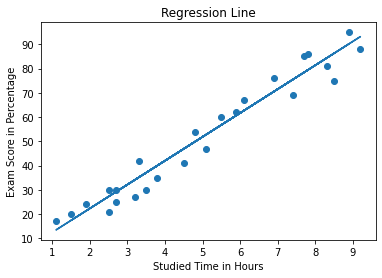

In [10]:
line =lm.coef_*x+lm.intercept_
plt.scatter(x,y)
plt.title('Regression Line')
plt.xlabel('Studied Time in Hours')  
plt.ylabel('Exam Score in Percentage')
plt.plot(x, line)
plt.show()

# **Predictions**

In [11]:
tp=lm.predict(X_test)

# **Predicted and Actual Values Comparison**

In [12]:
df1=pd.DataFrame({'Actual':y_test,'Predicated':tp})
df1

,Actual,Predicated
0,30,29.212228
1,25,29.212228
2,20,17.398196
3,35,40.041758
4,69,75.483855


# **Bar Graph**

Text(0.5, 1.0, 'Predictions')

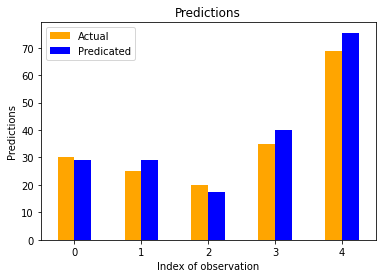

In [13]:
df1.plot.bar(rot=0,color=('orange','blue'))
plt.xlabel('Index of observation')
plt.ylabel('Predictions')
plt.title('Predictions')

# **Prediction for the Test Case(9.25 hours)**

In [14]:
hours = 9.25
scores = lm.predict([[hours]])
print("Number of hours = {}".format(hours))
print("Prediction Score = {}".format(scores[0]))

Number of hours = 9.25
Prediction Score = 93.69715467410802


# **Model Evaluation**

In [15]:
from sklearn import metrics
print("Mean Absolute Error:  ",metrics.mean_absolute_error(y_test,tp))
print("Mean Squared Error:  ",metrics.mean_squared_error(y_test,tp))
print("Root Mean Squared Error:  ",np.sqrt(metrics.mean_squared_error(y_test,tp)))

Mean Absolute Error:   3.825483356587598
Mean Squared Error:   18.518506789393577
Root Mean Squared Error:   4.303313466317969
